In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from numpy import nan,inf
import scipy.constants as sc
import matplotlib as mpl
import glob
from astropy.time import Time
np.set_printoptions(precision=4)
import matplotlib
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6
mpl.rcParams['text.usetex'] = True


MASS_TO_FREQ = sc.eV / sc.h
def plot_timescales( ax,ymin,ymax,annotate=True):

    l10ma_T = np.log10( 1/(1.0*sc.day*1 * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 day",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")
    
    # l10ma_T = np.log10( 1/(1.0*sc.day*14 * MASS_TO_FREQ) )
    # ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    # if annotate==True:
    #     ax.annotate(r"2 weeks",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(1.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 year",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(11.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T ,l10ma_T ],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"Solar Cycle",xy = [l10ma_T ,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(18.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    if annotate==True:
        ax.annotate(r"T$_{\rm obs}$",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")


#rho = 7.68351e-6 * 0.40 #0.46
rho = (0.4 * 1e9 * 100**3) * sc.c**3  * sc.hbar**3 / sc.eV**3
l10S_to_l10ga = lambda l10S,l10ma: l10S+9+l10ma-np.log10(rho)/2


def make_ul_plot(ax,l10ma , ul_auto,ul_full ):
    #fig , ax = plt.subplots(figsize=(5,4))
    #ax.set_title("95% UL (Bayesian approach)")
    #ax.fill_between(np.log10(PPTA_QUIJOTE[:,0]),np.log10(PPTA_QUIJOTE[:,1]),np.zeros(len(PPTA_QUIJOTE)),alpha=0.5,fc='darkgreen',label="PPTA-QUIJOTE")


    _l10ma = np.linspace(-24,-18.5,101)
    #Chandra
    ax.plot(_l10ma,np.log10(5e-13)*np.ones(len(_l10ma)),color="black",ls='--')
    ax.annotate("Chandra\n H1821+643",xy=(-18.5-0.05,np.log10(5e-13)-0.1),size=12,va="top",ha="right")

    #Planck
    ax.plot(_l10ma,_l10ma+9,color="black",ls=':',lw=2)
    ax.annotate("Planck",xy=(-19.3,-10.5),size=14,va="top",ha="right",rotation="25")


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'.',color='blue')
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'-',color='blue',label="Full-corr")
    except:
        pass


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'.',color='red')
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'-',color='red',label="Auto-corr")
    except:
        pass



    ax.set_xlim(-23.5,-18.5)
    ymin = -16
    ymax = -6
    ax.set_ylim(ymin,ymax)
    #plt.title(r"the 95% upper limit on $\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$"+
    #          "\n assuming local DM density " + r"$0.40 {\rm GeV}/{\rm cm}^3$")

    ax.legend(loc=4,prop={'size': 10})

    plot_timescales( ax,ymin,ymax,annotate=True)


    #ax.plot(mock[:,0] , l10S_to_l10ga(mock[:,2],mock[:,0]),'red' )

    #plot_timescales(ax,ymin,ymax)

    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    ax.set_ylabel(r"$\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$")
    ax.grid(axis="y")


def make_bf_plot(ax,l10ma,lbf_af,lbf_nf):

    #fig , ax = plt.subplots(figsize=(5,3))
    ymin = -10
    ymax = 20
    plot_timescales( ax,ymin,ymax,annotate=False)

    try:
        ax.plot(l10ma,lbf_nf,'-',color='b',label="Full vs None")
        ax.plot(l10ma,lbf_nf,'.',color='b')
    except:
        pass

    try:
        ax.plot(l10ma,lbf_af,'-',color='r',label="Full vs Auto")
        ax.plot(l10ma,lbf_af,'.',color='r')
    except:
        pass
    
    
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(-23.5,-18.5)
    ax.plot([-23.5,-18.5],[0,0],lw=2,color="black")


    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    #ax.set_ylabel(r"$\ln $BF$^{\rm full}_{\rm auto}$")
    ax.set_ylabel(r"$\ln $BF")
    ax.grid(axis="y")
    ax.legend(loc=4,prop={'size': 10})

# 10cm after subtraction

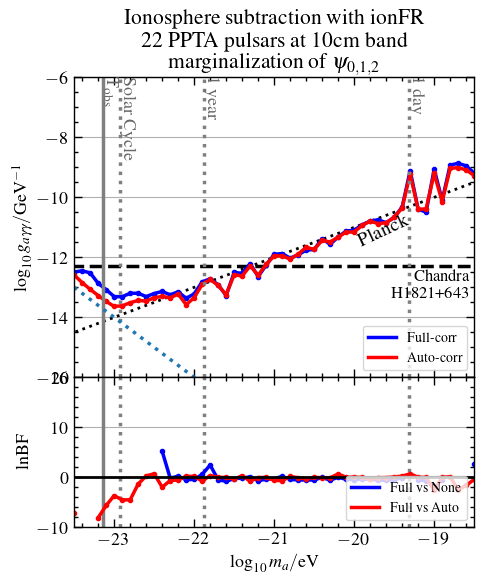

In [10]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(5,56)*0.1 -24
ul_auto_ion_10 = np.array([-0.846, -1.197, -1.523, -1.829, -2.123, -2.392, -2.471, -2.47 ,
       -2.491, -2.613, -2.601, -2.659, -2.804, -2.78 , -3.234, -3.099,
       -2.759, -2.691, -2.994, -3.399, -2.834, -2.981, -2.739, -3.154,
       -2.888, -2.708, -2.807, -3.012, -2.951, -2.819, -2.993, -2.788,
       -2.945, -2.881, -2.815, -2.911, -2.791, -2.75 , -2.931, -3.002,
       -2.922, -2.703, -1.682, -2.959, -3.036, -1.961, -2.998, -1.994,
       -2.062, -2.243, -2.529])


ul_full_ion_10 = np.array([-0.743, -0.805, -0.973, -1.421, -1.734,
       -2.064, -2.169, -2.153, -2.254, -2.463, -2.463, -2.492, -2.704,
       -2.705, -3.021, -2.975, -2.673, -2.67 , -2.972, -3.43 , -2.757,
       -2.891, -2.666, -3.197, -2.915, -2.657, -2.728, -2.985, -2.971,
       -2.916, -2.994, -2.733, -3.024, -2.874, -2.779, -2.849, -2.774,
       -2.744, -2.805, -2.999, -2.925, -2.679, -1.567, -2.957, -3.144,
       -1.816, -2.954, -1.88 , -1.922, -2.107, -2.445])


make_ul_plot(axes[0],l10ma,ul_auto_ion_10,ul_full_ion_10)
axes[0].set_title("Ionosphere subtraction with ionFR\n 22 PPTA pulsars at 10cm band\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')

lbf_ion_10 = np.array([-7.130e+00,       -inf,       -inf, -8.075e+00, -5.629e+00,
       -3.647e+00, -4.513e+00, -4.494e+00, -1.344e+00,  2.788e-01,
        7.247e-01, -1.970e+00, -6.313e-01, -5.433e-01,  2.309e-01,
        1.786e-01, -7.406e-01,  3.652e-01, -8.802e-03,  8.002e-03,
       -3.595e-01,  3.344e-01, -7.863e-01, -3.539e-02, -8.002e-03,
       -5.981e-01, -6.727e-01,  1.797e-01, -7.614e-02, -2.829e-01,
        5.601e-03, -7.062e-02, -6.644e-02,  6.700e-01,  1.689e-02,
        5.843e-02, -2.810e-02, -3.885e-01, -5.131e-02, -4.846e-02,
        8.781e-02,  2.466e-01,  6.914e-01,  3.139e-02, -7.379e-03,
       -2.622e+00,  2.187e-02,  1.238e-01, -2.496e+00, -1.602e+00,
       -4.222e-01])

lbf_nf_ion_10 = np.array([   inf,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
          inf,    inf,    inf,  5.234, -0.151,  0.23 , -0.494, -0.41 ,
        0.591,  2.463, -0.499, -0.789, -0.251, -0.166,  0.116, -0.683,
       -0.359, -0.258,  0.197, -0.418, -0.517, -0.539, -0.526, -0.017,
       -0.585,  0.039, -0.403, -0.444, -0.351, -0.377, -0.547, -0.618,
       -0.456, -0.069,    inf, -0.549, -0.641,    inf, -0.609,    inf,
          inf,    inf,  2.72 ])



make_bf_plot(axes[1],l10ma,lbf_ion_10,lbf_nf_ion_10)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/ul_bf_iono_10.jpg")


In [20]:
crit = np.where(lbf_nf_ion_10>5)[0]
np.array([crit,lbf_nf_ion_10[crit]]).T

array([[ 0.   ,    inf],
       [ 1.   ,    inf],
       [ 2.   ,    inf],
       [ 3.   ,    inf],
       [ 4.   ,    inf],
       [ 5.   ,    inf],
       [ 6.   ,    inf],
       [ 7.   ,    inf],
       [ 8.   ,    inf],
       [ 9.   ,    inf],
       [10.   ,    inf],
       [11.   ,  5.234],
       [42.   ,    inf],
       [45.   ,    inf],
       [47.   ,    inf],
       [48.   ,    inf],
       [49.   ,    inf]])

In [21]:
crit

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 42, 45, 47, 48, 49])